In [ ]:
import cv2;
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/content/93513185_p0_master1200.jpg')

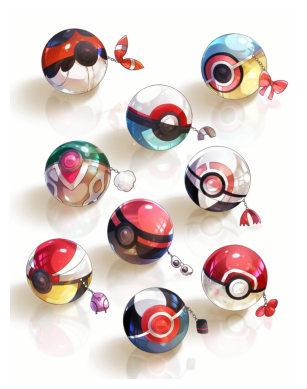

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

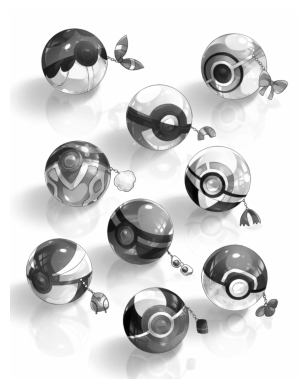

In [ ]:
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
resized_img = cv2.resize(gray_img, (gray_img.shape[1]//10, gray_img.shape[0]//10))

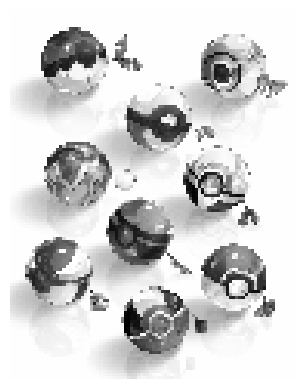

In [ ]:
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
_, thresh_simple = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [ ]:
thresh_adaptive = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

In [ ]:
_, thresh_otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Use the gray_img variable which is likely the grayscale version of the image.

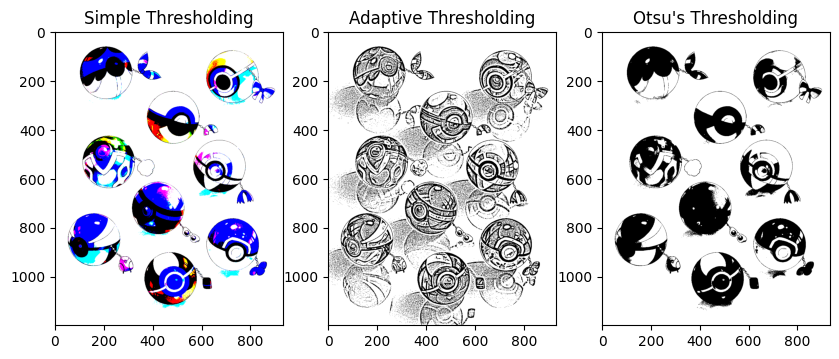

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(thresh_simple, cmap='gray')
plt.title('Simple Thresholding')

plt.subplot(1, 3, 2)
plt.imshow(thresh_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(thresh_otsu, cmap='gray')
plt.title('Otsu\'s Thresholding')

plt.show()

In [ ]:
edges = cv2.Canny(gray_img, 100, 200)

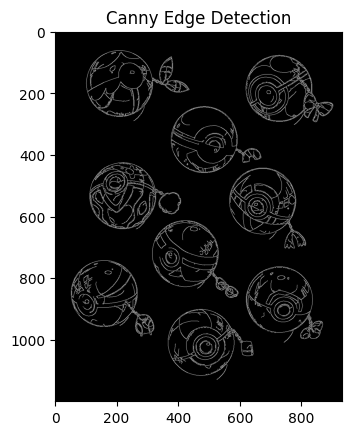

In [ ]:
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [ ]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_values)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

centers = np.uint8(centers)

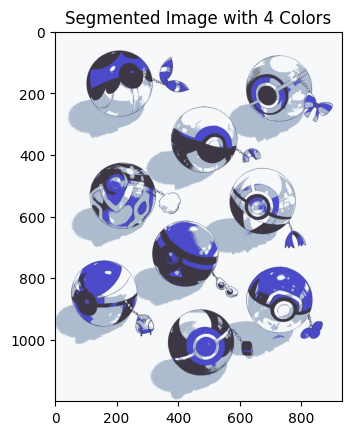

In [ ]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image)
plt.title(f'Segmented Image with {k} Colors')
plt.show()


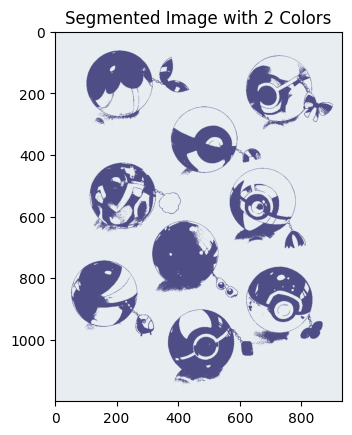

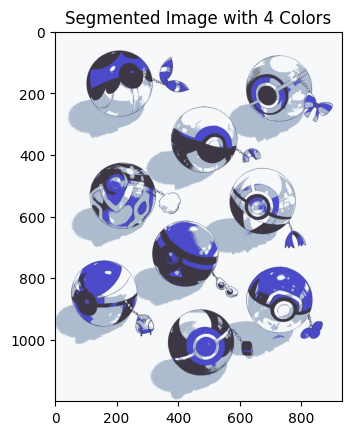

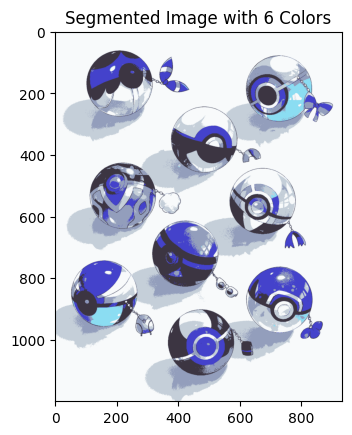

In [ ]:
for k in [2, 4, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_image = centers[kmeans.labels_.flatten()].reshape(img.shape)

    plt.imshow(segmented_image)
    plt.title(f'Segmented Image with {k} Colors')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # (height, width, channels)
model.add(layers.MaxPooling2D((2, 2)))  # Reduces the size by half

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the data for fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # Dense fully connected layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer for classification

# Summary of the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,858 (2.47 MB)

 Trainable params: 646,858 (2.47 MB)

 Non-trainable params: 0 (0.00 B)